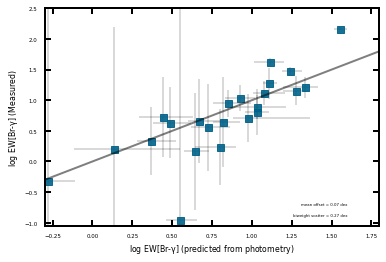

In [67]:
import numpy as np 
import matplotlib.pyplot as plt 


ews = np.loadtxt('measured_brg_ews.txt',usecols=(1,2,3,4,5))
ews = ews.T 

measured_ews = ews[0]
measured_ew_unc = ews[1]
measured_ew_unc_log = 0.434 * (measured_ew_unc / measured_ews)
joel_ews = ews[3]
joel_minus = ews[2]
joel_plus = ews[4]
joel_errs = np.array([joel_ews-joel_minus,joel_plus-joel_ews])
joel_errs_log = 0.434 * (joel_errs / joel_ews)
#plot_bounds = np.array([np.max([measured_ews,joel_plus]),np.max([measured_ews,joel_plus])])
#plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots()
ax.errorbar(np.log10(joel_ews),np.log10(measured_ews),yerr=measured_ew_unc_log,xerr=joel_errs_log,fmt='None',color='#113166',alpha=0.15)
ax.plot(np.log10(joel_ews),np.log10(measured_ews),'s',color='#006289',ms=7,alpha=0.9)
#ax.plot([0.0001,np.max([measured_ews,joel_plus])],[0.0001,np.max([measured_ews,joel_plus])],color='k',alpha=0.8)
#plt.subplots_adjust(right=0.98,top=0.98)
#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.tick_params(axis='both',which='both',direction='in',top=True,right=True)
ax.set_ylabel('log EW[Br-$\gamma$] (Measured)')
ax.set_xlabel('log EW[Br-$\gamma$] (predicted from photometry)')
ax.set_xlim((-0.3,1.8))
ax.set_ylim((-1.05,2.5))
#ax.set_xticks([-0.5,0.0,0.5,1.0,])
#ax.set_yticks([-0.5,0.0,0.5,1.0,1.5])
ax.plot([-5,5],[-5,5],'k',alpha=0.5)
ax.text(1.6,-0.72,'mean offset = 0.07 dex',horizontalalignment='right')
ax.text(1.6,-0.9,'biweight scatter = 0.27 dex',horizontalalignment='right')
#ax.plot(0.55,-0.48,'v',color='#7c0b0b',alpha=0.8)
plt.show()

#residuals = measured_ews - joel_ews 
#std = np.log10(np.std(residuals))
#print(std)



#fig2, ax2 = plt.subplots(figsize=(5,5))
#ax2.errorbar(measured_ews,joel_ews-measured_ews,yerr=joel_errs,xerr=measured_ew_unc,fmt='s',alpha=0.8)
#plt.show()

In [69]:
p = plt.rcParams.find_all(pattern='labelsize')
p.update(plt.rcParams.find_all(pattern='font.size'))
p

RcParams({'axes.labelsize': 7.8125,
          'font.size': 3.90625,
          'xtick.labelsize': 5.468750000000001,
          'ytick.labelsize': 5.468750000000001})

In [72]:
def scale_text(scale='bigger'):
       
    size_params = plt.rcParams.find_all(pattern='labelsize')
    size_params.update(plt.rcParams.find_all(pattern='font.size'))

    for i in size_params:
        if isinstance(plt.rcParams[i],float):
            if scale=='bigger':
                plt.rcParams[i] *= 1.25
            elif scale=='smaller':
                plt.rcParams[i] *= 0.80
            elif scale=='default':
                # reset to defaults
                raise NotImplementedError("Steven will write this")
            elif isinstance(scale,(float,int)):
                plt.rcParams[i] *= scale
            else:
                raise ValueError("not recognized")
    

In [71]:
scale_text(0.2)